<a href="https://colab.research.google.com/github/DiegoGodelli/Data-Science/blob/main/Analisando_os_Dados_do_Airbnb_em_Tokyo_Jap%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Tokyo*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Tokyo, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


###**<center>Tokyo - Japão<center>**
<center><img alt="Analisando Airbnb" width="8%" src="https://essaseoutras.com.br/wp-content/uploads/2014/06/bandeira-do-jap%C3%A3o-para-imprimir-.png"></center>




<center><img alt="Analisando Airbnb" width="80%" src="https://i.pinimg.com/originals/cb/81/04/cb810468d108a3149b4b3f3551fe4f4e.jpg"></center>

 - Os Dados apresentados a seguir são disponibilizados pelo próprio Airbnb no seu site de [Inside Airbnb](http://insideairbnb.com/get-the-data.html).
 - Vamos utilizar um unico arquivo de dados, referente a cidade de Tokyo no Japão. Para acessar os dados clique [aqui](https://drive.google.com/file/d/1yEaT5NyfTDygiGLBA4vM6JlApNkkdtsJ/view?usp=sharing)

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2021-06-30/visualisations/listings.csv")


## Análise dos Dados


**Dicionário das variáveis**
* `id` - Número de identificação do imóvel
* `name` - Nome da propriedade
* `host_id` - Número de identificação do proprietário
* `host_name` - Nome do Proprietário
* `neighbourhood_group` - Coluna não contém nenhum valor válido
* `neighbourhood` - Nome do bairro
* `latitude` - Latitude da propriedade
* `longitude` - Longitude da propriedade
* `room_type` - Informação sobre o tipo de quarto
* `price` - Preço do aluguel
* `minimum_nights` - Quantidade mínima de noites para reservar
* `number_of_reviews` - Número de reviews que a propriedade possui
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews por mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71707,139.82608,Entire home/apt,16000,3,165,2019-11-14,1.55,1,363
1,776070,Kero-kero house room 1,801494,Kei,NaN,Kita Ku,35.73844,139.76917,Private room,7739,3,228,2020-01-18,2.40,1,126
2,1016831,WOMAN ONLY LICENSED ! Cosy & Cat behnd Shibuya,5596383,Wakana,NaN,Setagaya Ku,35.65800,139.67134,Private room,4000,1,211,2020-03-05,2.73,1,0
3,1033276,private room @Senju area,5686404,Yukiko,NaN,Adachi Ku,35.74253,139.79730,Private room,30000,1,72,2018-04-15,0.81,2,271
4,1096292,Home stay with a Japanese language teacher fam...,6018145,Mari,NaN,Shinjuku Ku,35.69233,139.70851,Private room,9084,1,252,2020-02-12,2.82,3,365


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
# identificar o volume de dados do DataFrame
entrada = df.shape[0]
variaveis = df.shape[1]
print(f'Entradas: {entrada}')
print(f'Variáveis: {variaveis}')
print(" ")

# verificar Tipos das Variáveis
df.dtypes

Entradas: 10875
Variáveis: 16
 


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

 - O conjuto de dados explorado possui 16 colunas, as quais representam tipos de variáveis que previamente foram apresentadas com suas respectivas classificações. Além desta informação, econtramos 10.875 linhas que relatam as entradas do arquivo de dados.

- Também podemos notar que para cada variável é visível tipos diferentes.

Segue breve resumo dos tipos encontrados **para estes dados em especifico**:

* `int64` - Tipo de dado para numeros inteiros;
* `object` - Textos;
* `float64` - Tipo de dado para números de ponto flutuante, ou seja, um número racional.


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**


Ao estudar um *dataset* devemos analisar expressamente a ausência dos dados, visto que a grande porcentagem de dados inexistentes poderá impactar diretamente na análise. Deste modo tem-se as seguintes implicações.

* A coluna `neighbourhood_group` possui 100% dos seus valores ausentes, sendo assim uma variável dispensável para todo o conjunto. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em cerca de 20% dos dados analisados.
* A variável `host_name` têm aproximadamente 0,18% dos valores nulos.


In [5]:
print("    Os dados a baixo são expressos em %")
print("--------------------------------------------")

(df.isnull().sum() / df.shape[0] *100).sort_values(ascending=False)

    Os dados a baixo são expressos em %
--------------------------------------------


neighbourhood_group               100.000000
reviews_per_month                  18.657471
last_review                        18.657471
host_name                           0.183908
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
name                                0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

A seguir foi plotado graficos Histogramas para que seja mais facil compreender as distribuições de variáveis.

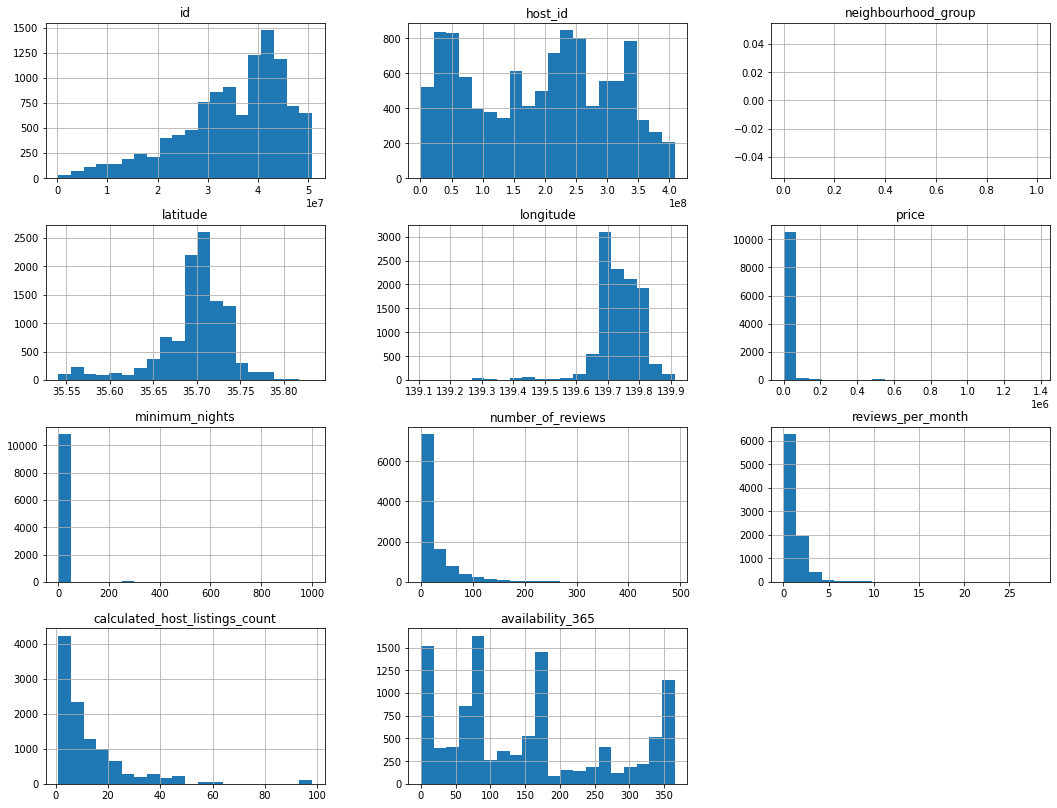

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(18,14));

### **Q4. Qual a média dos preços de aluguel?**

In [7]:
media = df.price.mean()
media_arred = round(media, 2)

print(f'A média dos preços na cidade de Tokyo é de {media_arred} Ienes')

A média dos preços na cidade de Tokyo é de 19236.77 Ienes


 - A média de Preços na cidade de Tokyo gira em torno de 19.236,77 Ienes. 
 Levando em conta que o Iene é 0,047 do Real, temos em média 913,32 Reais.

### **Q5. Qual a correlação existente entre as variáveis**

**Antes de tudo, o que seria correlação?**
- Chama-se correlação à ligação correspondente que existe entre dois ou mais elementos.
-No campo da matemática e estatística, a correlação refere-se à proporcionalidade e à relação linear que existem entre variáveis diferentes. Se os valores de uma variável são sistematicamente modificados em relação aos valores de outra, diz-se que as duas variáveis estão correlacionadas.


Deste modo o grafico plotado a baixo relaciona entre diferentes variáveis as possiveis correlações. Quanto maior for a "força" de correlação, mais proximo de 1 o grafico apresentará.

In [8]:
# criar uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.018572,-0.045836,-0.020217,0.139757,-0.028489
minimum_nights,-0.018572,1.000000,-0.037179,-0.039333,0.055160,0.076538
number_of_reviews,-0.045836,-0.037179,1.000000,0.663077,-0.156734,0.022080
reviews_per_month,-0.020217,-0.039333,0.663077,1.000000,-0.124683,0.005633
calculated_host_listings_count,0.139757,0.055160,-0.156734,-0.124683,1.000000,0.127638
availability_365,-0.028489,0.076538,0.022080,0.005633,0.127638,1.000000


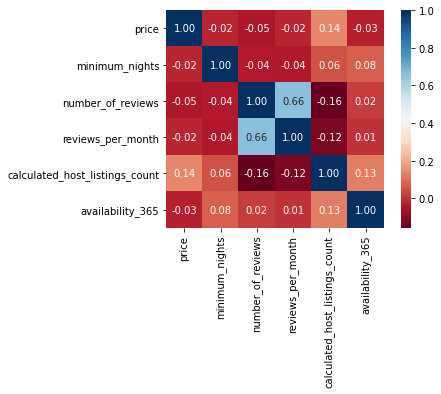

In [9]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb de Tokyo?**

**Dicionário das Variáveis do item (room_type)**

- `Entire home/apt` - Casa/Apartamento Completo
- `Private room` - Quarto Privado
- `Shared room` - Quarto Compartilhado
- `Hotel room` - Quarto de Hotel


In [10]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    7548
Private room       2557
Shared room         399
Hotel room          371
Name: room_type, dtype: int64

In [11]:
# mostrar a porcentagem de cada tipo de imóvel disponível
print(" ")
print("Os dados a baixo são expressos em %")
print("-------------------------------------")
porc_room_type = df.room_type.value_counts()/df.shape[0]*100
porc_room_type

 
Os dados a baixo são expressos em %
-------------------------------------


Entire home/apt    69.406897
Private room       23.512644
Shared room         3.668966
Hotel room          3.411494
Name: room_type, dtype: float64

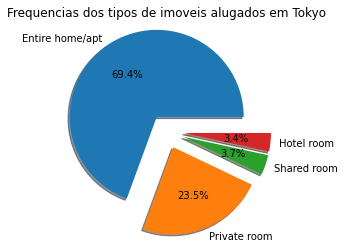

In [12]:
label_list = ['Entire home/apt','Private room','Shared room','Hotel room']
explode = (0.2,0.2,0.2,0.2)
plt.pie(porc_room_type, labels=label_list, explode= explode,autopct='%1.1f%%',shadow=True);
plt.title('Frequencias dos tipos de imoveis alugados em Tokyo');


 - Tendo como base as informações anteriores, cerca de 70% das propriedades locadas pelo Airbnb na cidade de Tokyo, são Casas e Apartamentos completos.


### **Q7. Qual a localidade mais cara do dataset?**



In [13]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Chiyoda Ku       67478.470930
Minato Ku        61248.659389
Edogawa Ku       37334.572289
Hinohara Mura    36753.500000
Chuo Ku          34266.070560
Komae Shi        23333.333333
Hamura Shi       22087.000000
Nakano Ku        21713.604811
Toshima Ku       18837.979466
Shinagawa Ku     18814.995305
Name: price, dtype: float64

In [14]:
# ver quantidade de imóveis
print('1º colocado Chiyoda Ku possui',df[df.neighbourhood == "Chiyoda Ku"].shape[0],'propriedades')
print('2º colocado Minato Ku possui',df[df.neighbourhood == "Minato Ku"].shape[0],'propriedades')
print('3º colocado Edogawa Ku possui',df[df.neighbourhood == "Edogawa Ku"].shape[0],'propriedades')
print('4º colocado Hinohara Mura possui',df[df.neighbourhood == "Hinohara Mura"].shape[0],'propriedades')
print('5º colocado Chuo Ku possui',df[df.neighbourhood == "Chuo Ku"].shape[0],'propriedades')
print('6º colocado Komae Shi possui',df[df.neighbourhood == "Komae Shi"].shape[0],'propriedades')
print('7º colocado Hamura Shi possui',df[df.neighbourhood == "Hamura Shi"].shape[0],'propriedades')
print('8º colocado Nakano Ku possui',df[df.neighbourhood == "Nakano Ku"].shape[0],'propriedades')
print('9º colocado Toshima Ku possui',df[df.neighbourhood == "Toshima Ku"].shape[0],'propriedades')
print('10º colocado Shinagawa Ku possui',df[df.neighbourhood == "Shinagawa Ku"].shape[0],'propriedades')

1º colocado Chiyoda Ku possui 172 propriedades
2º colocado Minato Ku possui 458 propriedades
3º colocado Edogawa Ku possui 166 propriedades
4º colocado Hinohara Mura possui 2 propriedades
5º colocado Chuo Ku possui 411 propriedades
6º colocado Komae Shi possui 3 propriedades
7º colocado Hamura Shi possui 4 propriedades
8º colocado Nakano Ku possui 291 propriedades
9º colocado Toshima Ku possui 974 propriedades
10º colocado Shinagawa Ku possui 213 propriedades


- Vemos que atravez da análise anterior nem sempre as primeiras colocações retratam a realidade. O 4º colocado no ranking de bairros mais caros, possui somente duas propriedades, fazendo com que destue do restante.
- Deste modo podemos concluir que a melhor forma de analisar está questão, seria obter dados de qualidade de vida e investimentos de infraestrutura para cada bairro. Para assim aliados às estás informações, prover a melhor resposta.



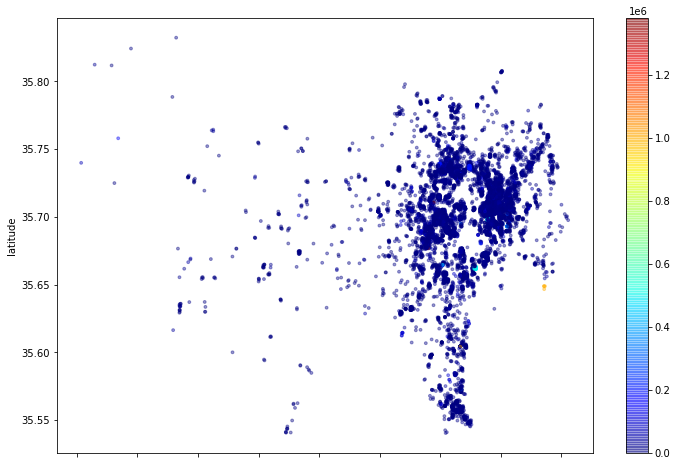

In [15]:
# plotar os imóveis pela latitude-longitude

df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8,cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [16]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

3.459402298850575

- Em média cerca de 3,45 noites as propriedades cadastradas no Airbnb ficam ocupadas.

- Deste modo podemos **supor** que a maioria dos Imóveis/Quartos são locados nos finais de semana. Sendo eles Sexta-feira, Sábado e Domingo. Uma média de 3 dias.

- No entanto para que o argumento anterior possa ser certificado, deve-se analisar dados dos dias locados.

## Conclusões


- A princípio os valores ausentes contemplados no objeto de estudo eram por si só relevantes, no entanto para a análise como um todo tornaram-se dispensáveis.
- Por outro lado podemos aferir a coorelação dos dados que em sua totalidade, não possuiam muita "afinidade" entre si.
- Indo mais a fundo conseguimos destacar pontos importantes como a definição média de dias que os Imóveis passavam locados e até mesmo supor que pela variação de dias tratavam-se de finais de semana. Também conseguimos definir categoricamente que cerce de 70% de todas as locações estão concentradas em Casas e Apartamento completos.
- Por fim não conseguimos defenir com um grau de aceitação relevante os bairros que possuiam os imóveis mais caros, visto que alguns dados mascaravam a resposta. Ficando assim dependetes de outros tipos de dados ou até mesmo informções adicionais, para que tais conclusões fossem tomadas.


Gostária de ressaltar que os dados utilizados é uma versão resumida. Para obter uma análise mais abrangente recomenda-se utilizar os dados completos. 